In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


In [6]:
data=pd.read_csv('mcdonalds.csv')

In [7]:
data.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [8]:
data.info

<bound method DataFrame.info of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  
0         No         No            -3   61  Every three months  Female  
1         No         No            +2   51  Every three months  Female  
2        Yes         No            +1   62  Every three months  Female  
3         No        Yes            +4   69         Once a week  Female  
4        Yes         No            +2   49        Once a month    Male  
...      ...        ...           ...  ...                 ...     ...  
1448      No        Yes  I hate it!-5   47         Once a year    Male  
1449     Yes         No            +2   36         Once a week  Female  
1450      No         No            +3   52        Once a month  Female  
1451     Yes         No            +4   41  Every three months    Male  
1452      No        Yes            -3   30  Every three months    Male  

[1453 rows x 15 columns]>

In [10]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [11]:
data.shape

(1453, 15)

In [12]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [13]:
df= data.iloc[:, 0:11].replace({"Yes": 1, "No": 0})
print(df)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1             1        0           0  
2     

In [14]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_variance
})
print(pca_summary)

   Principal Component  Explained Variance  Cumulative Explained Variance
0                  PC1            0.299447                       0.299447
1                  PC2            0.192797                       0.492244
2                  PC3            0.133045                       0.625290
3                  PC4            0.083096                       0.708386
4                  PC5            0.059481                       0.767866
5                  PC6            0.050300                       0.818166
6                  PC7            0.043849                       0.862015
7                  PC8            0.039548                       0.901563
8                  PC9            0.036761                       0.938323
9                 PC10            0.032353                       0.970677
10                PC11            0.029323                       1.000000


In [15]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=df.columns)
print(loadings_df)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy       0.476933  0.155332  0.006356 -0.116232 -0.304443  0.108493   
convenient -0.363790 -0.016414 -0.018809  0.034094  0.063839  0.086972   
spicy       0.304444  0.062515  0.037019  0.322359  0.802373  0.064642   
fattening   0.055162 -0.142425  0.197619 -0.354139  0.253960 -0.097363   
greasy      0.307535 -0.277608 -0.070620  0.073405 -0.361399 -0.107930   
fast       -0.170738  0.347830  0.355087  0.406515 -0.209347  0.594632   
cheap      -0.280519 -0.059738  0.707637 -0.385943  0.036170 -0.086846   
tasty      -0.013041  0.113079 -0.375934 -0.589622  0.138241  0.627799   
expensive  -0.572403  0.018465 -0.400280  0.160512  0.002847 -0.166197   
healthy     0.110284  0.665818  0.075634  0.005338 -0.008707 -0.239532   
disgusting -0.045439  0.541616 -0.141730 -0.250910 -0.001642 -0.339265   

                 PC7       PC8       PC9      PC10      PC11  
yummy       0.337186  0.471514 -0.329042  0.2137

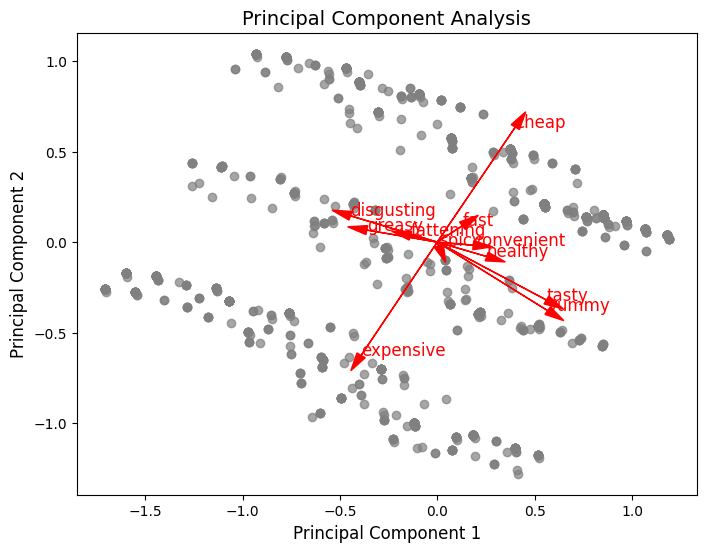

In [16]:
pca = PCA(n_components=2)  # We are reducing to 2 components for the plot
principal_components = pca.fit_transform(df)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Plotting the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='grey', alpha=0.7)
for i, feature in enumerate(df.columns):
    plt.arrow(0, 0, loadings[0, i]*max(pca_df['PC1']), loadings[1, i]*max(pca_df['PC2']),
              head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(loadings[0, i]*max(pca_df['PC1']), loadings[1, i]*max(pca_df['PC2']),
             feature, color='red', fontsize=12)
# Adding labels and title
plt.title('Principal Component Analysis', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Show the plot
plt.show()

In [18]:
wcss=[]
df_km28={}
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,n_init=10, random_state=1234)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    df_km28[str(i)]=kmeans

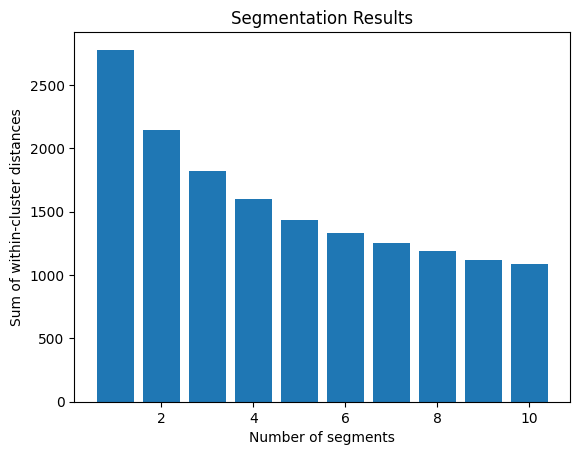

In [19]:
plt.bar(range(1,11),wcss)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

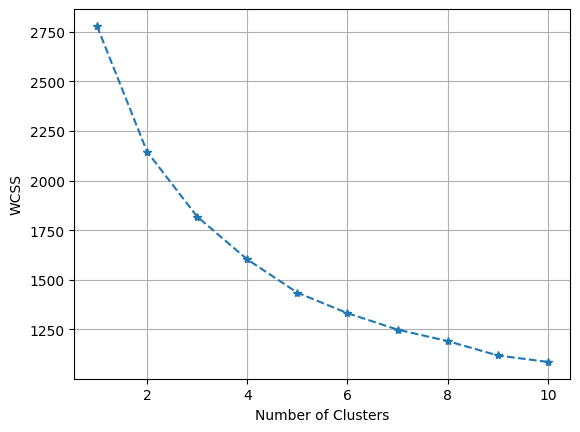

In [20]:
plt.plot(range(1,11),wcss,"*--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

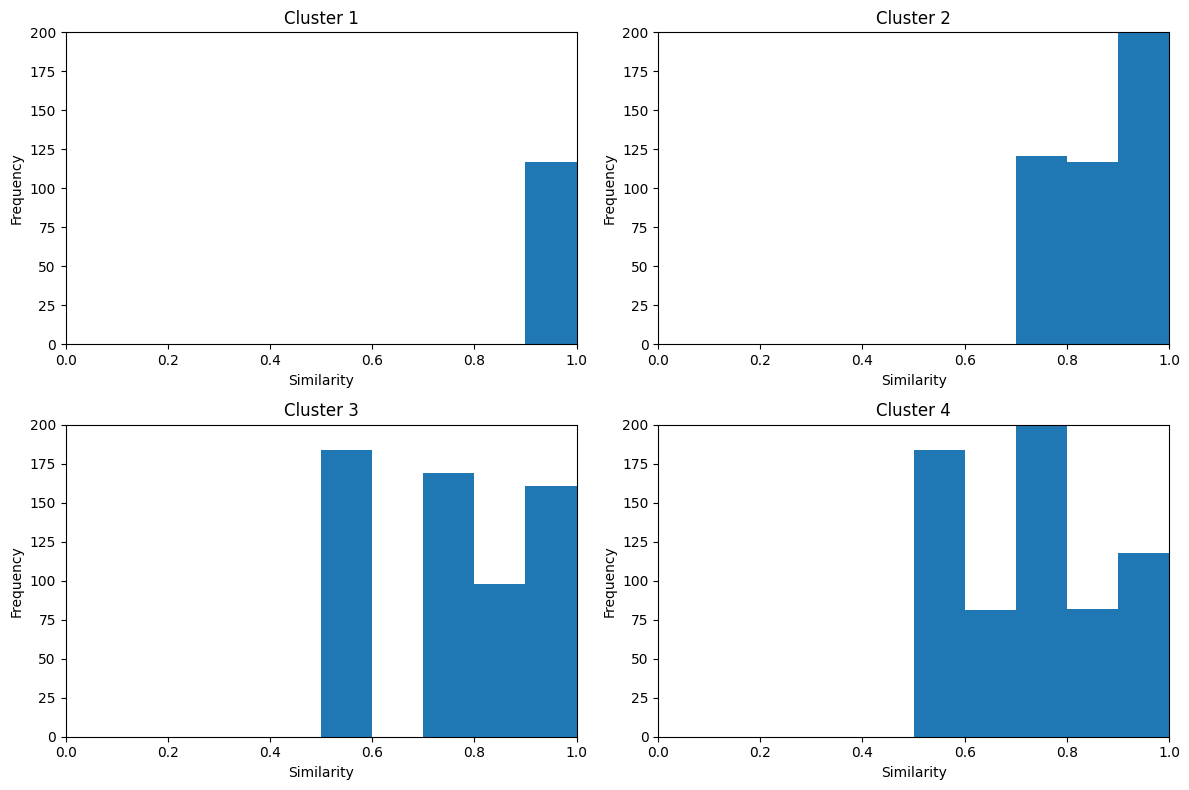

In [23]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200
def plot_histogram(ax, similarities, cluster_num):
    ax.hist(similarities, bins=num_bins, range=range_values)
    ax.set_xlabel('Similarity')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Cluster {cluster_num}')
    ax.set_xlim(range_values)
    ax.set_ylim(0, max_frequency)
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(1, 5):

    labels = df_km28[str(i)].predict(df)
    similarities = df_km28[str(i)].transform(df).min(axis=1)

    # Determine the subplot position
    row = (i - 1) // 2
    col = (i - 1) % 2


    plot_histogram(axs[row, col], similarities, i)


plt.tight_layout()
plt.show()

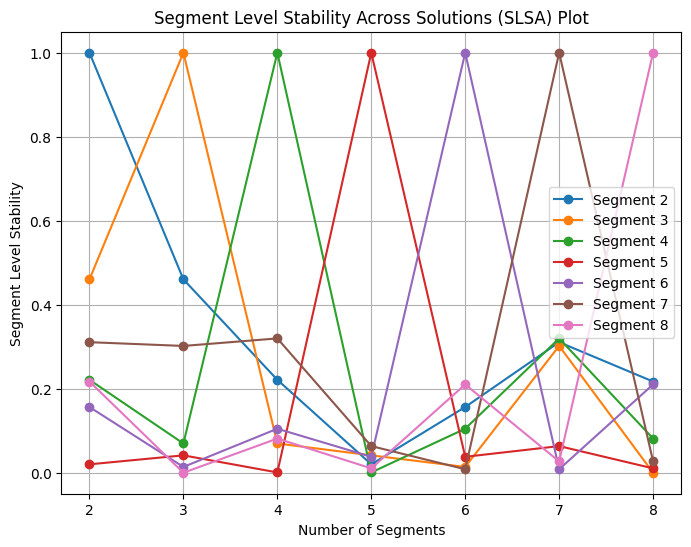

In [27]:


def calculate_stability(segment_stability, segment_idx):
    # Compare the current segment's labels with all other segments' labels
    return [np.mean(segment_stability[segment_idx] == labels) for labels in segment_stability]

num_segments = range(2, 9)
segment_stability = []
for segment in num_segments:
    labels_segment = df_km28[str(segment)].predict(df)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))

for segment_idx, segment in enumerate(num_segments):
    stability_values = calculate_stability(segment_stability, segment_idx)
    plt.plot(num_segments, stability_values, marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

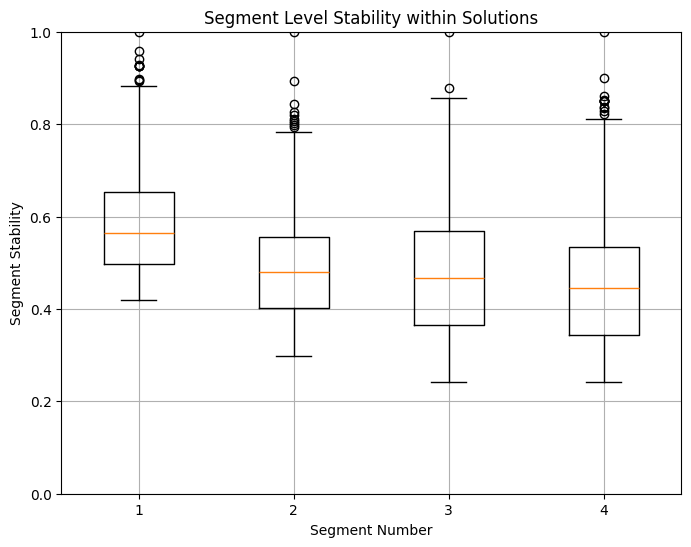

In [30]:
def get_normalized_stability(segment_labels, segment_similarities, segment):
    similarities = segment_similarities[segment]
    return similarities / np.max(similarities)

# Initialize dictionaries to store labels and similarities
segment_labels = {segment: df_km28[segment].predict(df) for segment in ["1", "2", "3", "4"]}
segment_similarities = {segment: df_km28[segment].transform(df).min(axis=1) for segment in ["1", "2", "3", "4"]}

# Calculate stability values for each segment
segment_stability_values = [get_normalized_stability(segment_labels, segment_similarities, segment) for segment in segment_similarities]

# Plotting
plt.figure(figsize=(8, 6))
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_similarities) + 1), segment_similarities.keys())
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.grid(True)

plt.show()

In [37]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)

# Count the occurrences of each numeric value
like_n_counts = data['Like.n'].value_counts().reset_index()
like_n_counts.columns = ['Numeric Value', 'Count']
print(like_n_counts)

   Numeric Value  Count
0            0.0    169
1           -3.0     73
2           -4.0     71
3           -2.0     59
4           -1.0     58


<Figure size 700x500 with 0 Axes>

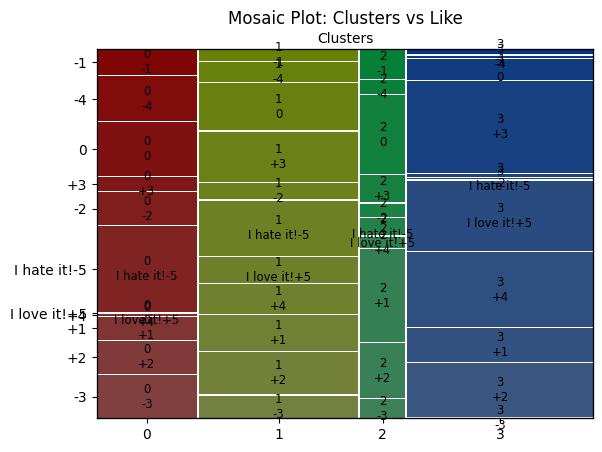

In [41]:
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.mosaicplot import mosaic
def encode_columns(df, columns):
    label_encoder = LabelEncoder()
    for col in columns:
        df[col] = label_encoder.fit_transform(df[col])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']


data = encode_columns(data, cat)

df_eleven = data[cat]

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
data['cluster_num'] = kmeans.fit_predict(df_eleven)


unique_like_values = data['Like'].unique()
crosstab = pd.crosstab(data['cluster_num'], data['Like'])
crosstab = crosstab[unique_like_values]  # Reorder columns

plt.figure(figsize=(7, 5))
mosaic(crosstab.stack(), title="Mosaic Plot: Clusters vs Like")
plt.xlabel('Clusters')
plt.ylabel('Like Ratings')
plt.show()